<a href="https://colab.research.google.com/github/WenchangGaoT/VA_Group1/blob/main/BitMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image

In [2]:
img_bmp = Image.open('Lekagul Roadways.bmp')
# img_jpg = Image.open('Lekagul Roadways labeled v2.jpg')

In [3]:
import numpy as np

In [ ]:
img_bmp = np.array(img_bmp)
station_map = {}
for i in img_bmp:
  for j in i: 
    if j != 0 and j != 35: station_map.update({j: 'New Node'})
print(len(station_map))

34


In [4]:
coordinate_dict = {}
entrances, general_gates, ranger_stops, gates, campings, ranger_bases = 0, 0, 0, 0, 0, 0
shape_x, shape_y = img_bmp.shape
histo = np.zeros((255,), dtype=np.int32)
bmp_list = []
print(img_bmp.dtype)
for x in range(shape_x):
  for y in range(shape_y):
    histo[img_bmp[x, y]] += 1
for i in range(1, 255):
  if histo[i] > 0 and i != 35:
    print(i, histo[i])
    bmp_np = np.ones_like(img_bmp, dtype=np.uint8)*i 
    img_temp = Image.fromarray(bmp_np)
    img_temp.save('%d.bmp' % i)
    # bmp_list




AttributeError: ignored

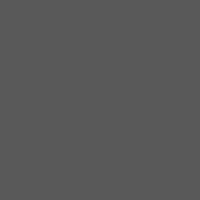

TypeError: ignored

In [ ]:
bmp_34 = Image.open('24.bmp')
bmp_34.show()
img_bmp = Image.open('Lekagul Roadways.bmp', info=1)
img_bmp.show()
# print(bmp_8)

In [5]:
img_np = np.array(img_bmp)
histo = np.zeros((255), dtype=np.int32)
for i in range(200):
  for j in range(200):
    if histo[img_np[i, j]] == 0:
      img_temp_np = np.ones_like(img_np)*i 
      img_temp_bmp = Image.fromarray(img_temp_np)
      img_temp_bmp.save('%d.bmp' % img_np[i, j])
    histo[img_np[i, j]] += 1

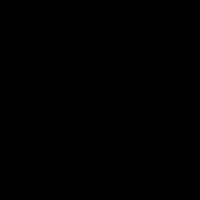

0


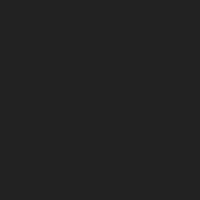

1


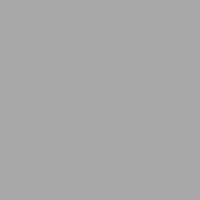

2


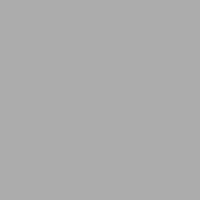

3


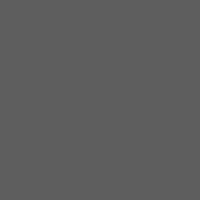

4


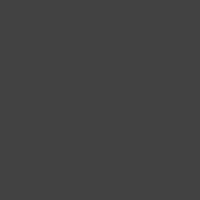

5


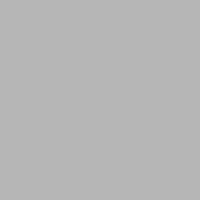

6


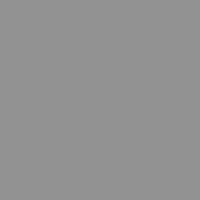

7


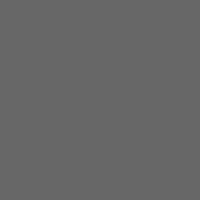

8


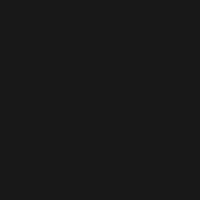

9


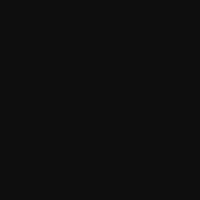

10


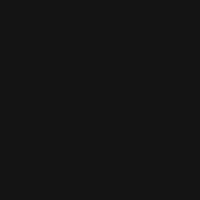

11


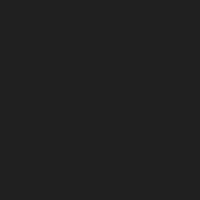

12


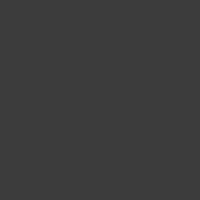

13


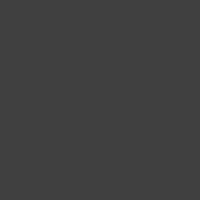

14


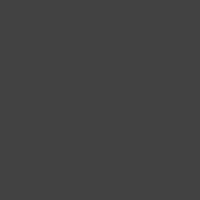

15


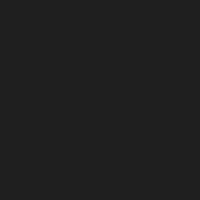

16


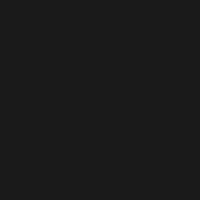

17


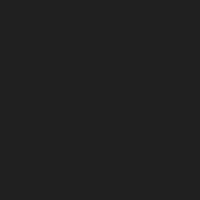

18


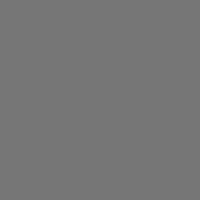

19


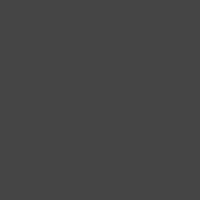

20


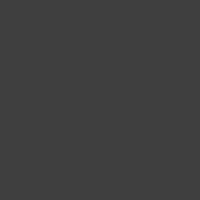

21


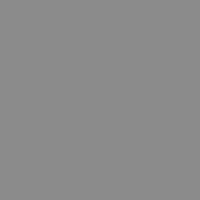

22


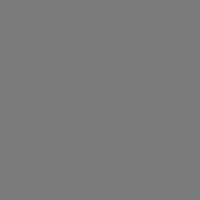

23


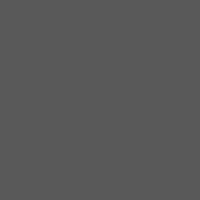

24


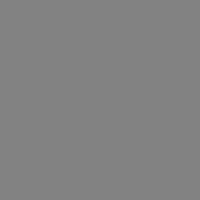

25


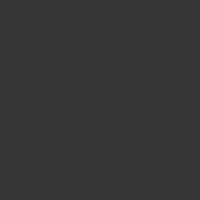

26


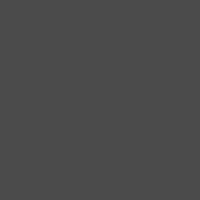

27


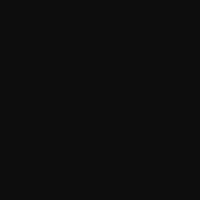

28


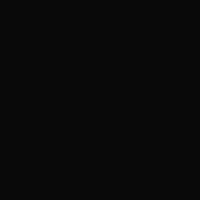

29


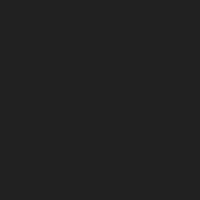

30


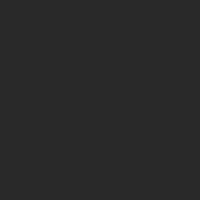

31


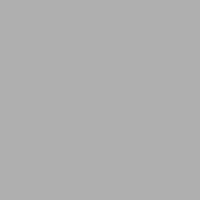

32


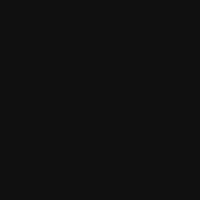

33


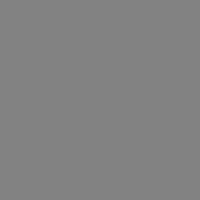

34


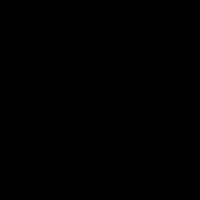

35


In [6]:
for i in range(36):
  temp = Image.open('%d.bmp' % i)
  temp.show()
  print(i)

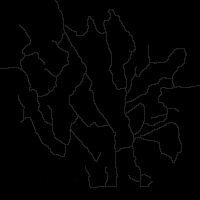

In [7]:
fig = Image.fromarray(img_np)
fig.show()

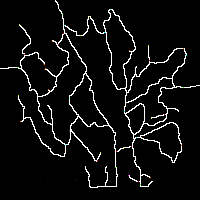

In [8]:
fig = Image.open('Lekagul Roadways.bmp')
fig_rgb = fig.convert('RGB')
fig_rgb.show()

In [9]:
fig_np = np.array(fig_rgb)
print(fig_np.shape)
print(fig_np.dtype)

(200, 200, 3)
uint8


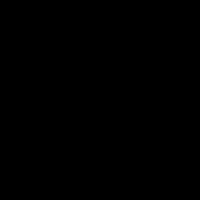

0_0_0.jpg


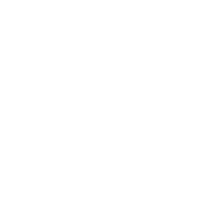

255_255_255.jpg


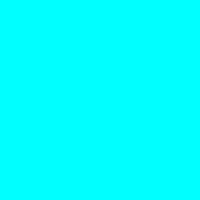

0_255_255.jpg


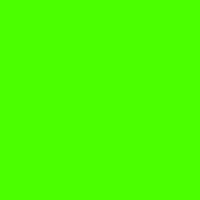

76_255_0.jpg


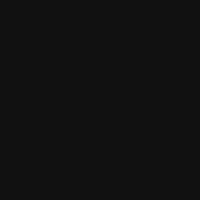

17_17_17.jpg


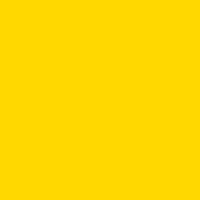

255_216_0.jpg


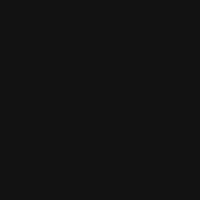

18_18_18.jpg


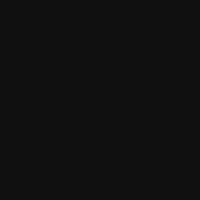

16_16_16.jpg


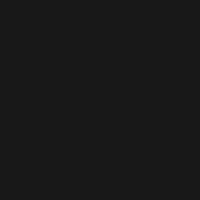

24_24_24.jpg


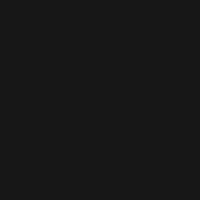

23_23_23.jpg


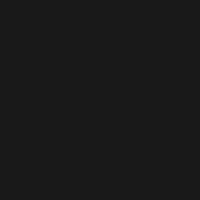

25_25_25.jpg


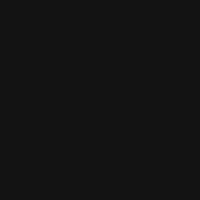

19_19_19.jpg


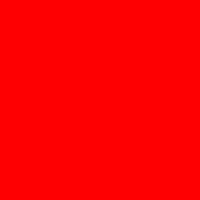

255_0_0.jpg


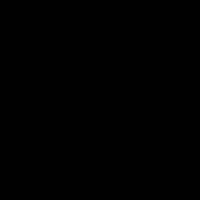

1_1_1.jpg


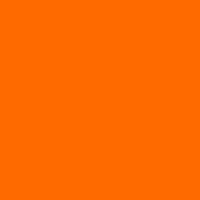

255_106_0.jpg


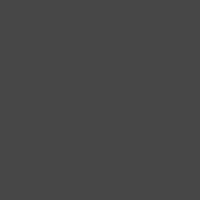

70_70_70.jpg


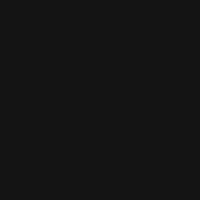

20_20_20.jpg


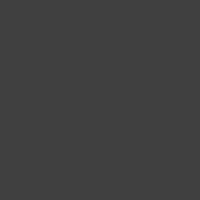

64_64_64.jpg


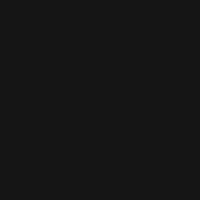

21_21_21.jpg


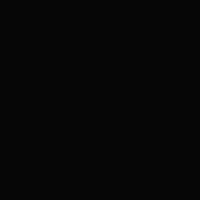

6_6_6.jpg


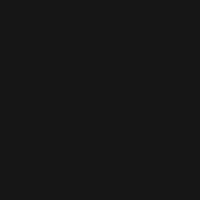

22_22_22.jpg


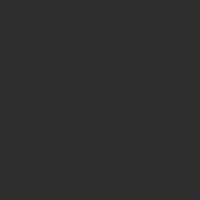

46_46_46.jpg


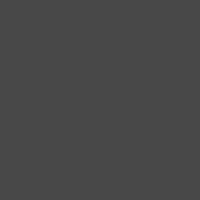

72_72_72.jpg


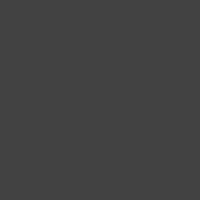

67_67_67.jpg


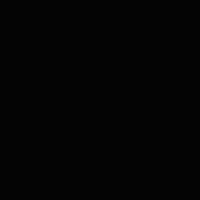

5_5_5.jpg


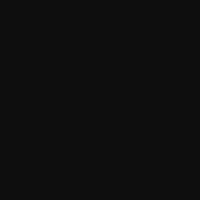

14_14_14.jpg


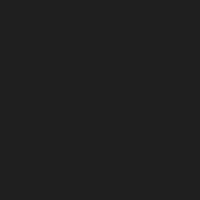

31_31_31.jpg


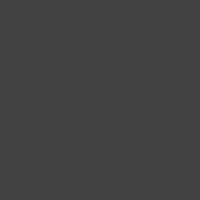

66_66_66.jpg


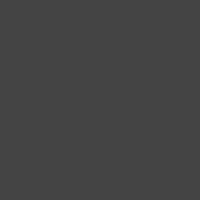

68_68_68.jpg


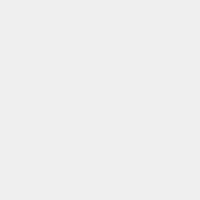

239_239_239.jpg


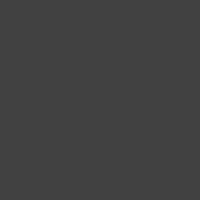

65_65_65.jpg


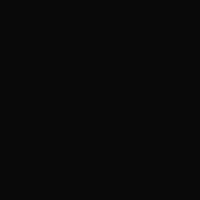

9_9_9.jpg


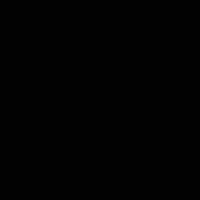

2_2_2.jpg


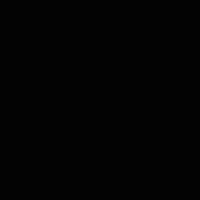

3_3_3.jpg


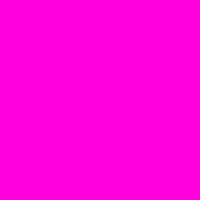

255_0_220.jpg


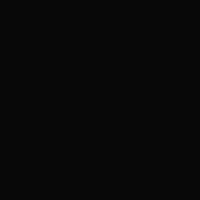

8_8_8.jpg


In [10]:
saved_tuple = {}
for i in range(200):
  for j in range(200):
    cur_tuple = (fig_np[i][j][0], fig_np[i][j][1], fig_np[i][j][2])
    if cur_tuple not in saved_tuple.keys():
      temp = np.ones_like(fig_np, dtype=np.uint8)
      for l in range(200):
        for k in range(200):
          for z in range(3):
            temp[l, k, z] = cur_tuple[z]
      temp_jpg = Image.fromarray(temp)
      temp_jpg.show()
      print('%d_%d_%d.jpg' % cur_tuple)
      temp_jpg.save('%d_%d_%d.jpg' % cur_tuple)
      saved_tuple[cur_tuple] = (i, j)

In [ ]:
to_clean = [(17, 17, 17), (18, 18, 18), (16, 16, 16), (24, 24, 24), (23, 23, 23), (25, 25, 25), 
            (19, 19, 19), (1, 1, 1), (20, 20, 20), (70, 70, 70), (64, 64, 64), (21, 21, 21), 
            (6, 6, 6), (22, 22, 22), (46, 46, 46), (72, 72, 72), (67, 67, 67), (5, 5, 5), 
            (14, 14, 14), (31, 31, 31), (66, 66, 66), (68, 68, 68)]

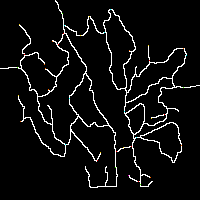

In [11]:
# Clean and convert the bmp into a jpg
fig_np = np.array(Image.open('Lekagul Roadways.bmp').convert('RGB'))
for i in range(200):
  for j in range(200):
    cur_tuple = fig_np[i, j, :]
    flag = cur_tuple[0] == cur_tuple[1] and cur_tuple[1] == cur_tuple[2]
    if flag:
      fig_np[i, j, :] = np.ones((3), dtype=np.uint8)*255 if cur_tuple[0] > 123 \
                                          else np.zeros((3), dtype=np.uint8)
cleaned_fig_np = fig_np
cleaned_fig_jpg = Image.fromarray(cleaned_fig_np)
cleaned_fig_jpg.show()
cleaned_fig_jpg.save('cleaned_roadways.jpg')


In [12]:
name_list = ['general_gate', 'entrance', 'ranger_stop', 'gate', 'camping', 'ranger_base']
name_color_dict = {
    'general_gate':(0, 255, 255),
    'entrance':(76, 255, 0),
    'ranger_stop':(255, 216, 0),
    'gate':(255, 0, 0),
    'camping':(255, 106, 0),
    'ranger_base':(255, 0 , 220)
}

In [13]:
color_name_dict = {}
for key in name_color_dict:
  color_name_dict[name_color_dict[key]] = key
# print(color_name_dict)

In [14]:
sensor_coordinate_dict = {}
coordinate_sensor_dict = {}
sensor_index_dict = {}
index_sensor_dict = {}
name_count = {}
index = 50
for i in range(200):
  for j in range(200):
    cur = (cleaned_fig_np[i, j, 0], cleaned_fig_np[i, j, 1], cleaned_fig_np[i, j, 2])
    if cur in color_name_dict.keys():
      sensor_type = color_name_dict[cur]
      if sensor_type not in name_count.keys():
        name_count[sensor_type] = 0
      sensor = (sensor_type+'_%d') % name_count[sensor_type]
      name_count[sensor_type] += 1
      sensor_index_dict[sensor] = index
      index_sensor_dict[index] = sensor
      sensor_coordinate_dict[sensor] = (i, j)
      coordinate_sensor_dict[(i, j)] = sensor
      index += 1

In [15]:
# Create a simplified graph for DFS
graph = np.zeros((200, 200), dtype=np.uint8)
for i in range(200):
  for j in range(200):
    cur = (cleaned_fig_np[i, j, 0], cleaned_fig_np[i, j, 1], cleaned_fig_np[i, j, 2])
    if cur == (255, 255, 255):
      graph[i][j] = 1
      continue
    if (i, j) in coordinate_sensor_dict.keys():
      id = sensor_index_dict[coordinate_sensor_dict[(i, j)]]
      graph[i][j] = id
# print(graph)

In [28]:
action_list = ['up', 'down', 'left', 'right']
last_action = None
distance = 0.
weighted_graph = np.zeros((index, index), dtype=np.float32)
graph_copy = graph.copy()

def compute_distance(x1, y1, x2, y2):
  global distance
  global last_action
  global graph_copy
  global action_list
  # print(last_action)
  if x1 == x2 and y1 == y2: 
    return True
  if x1 < 0 or x1 >= 200 or y1 < 0 or y1 >= 200:
    return False
  if graph_copy[x1][y1] != 1:
    return False
  graph_copy[x1][y1] = 0
  for action in action_list:
    if last_action != None:
      new_dist = np.sqrt(2) if (action in ['up', 'down'] and last_action in ['left', 'right']) or \
                            (action in ['left', 'right'] and last_action in ['up', 'down']) else 1. 
    else: 
      new_dist = 1.
    temp = last_action
    last_action = action
    # print(last_action)
    distance += new_dist
    if action == 'up':
      done = compute_distance(x1, y1-1, x2, y2)
    elif action == 'down':
      done = compute_distance(x1, y1+1, x2, y2)
    elif action == 'left':
      done = compute_distance(x1-1, y1, x2, y2)
    else:
      done = compute_distance(x1+1, y1, x2, y2)
    if done: return True
    last_action = temp
    distance -= new_dist

# Calculate the distances
sensor_distance_dict = {}
for sensor1 in sensor_coordinate_dict.keys():
  id1 = sensor_index_dict[sensor1]
  x1, y1 = sensor_coordinate_dict[sensor1]
  for sensor2 in sensor_coordinate_dict.keys():
    id2 = sensor_index_dict[sensor2]
    x2, y2 = sensor_coordinate_dict[sensor2]
    if id1 == id2: continue
    last_action = None
    distance = 0.
    graph_copy = graph.copy()
    graph_copy[x1][y1] = 1
    graph_copy[x2][y2] = 1
    done = compute_distance(x1, y1, x2, y2)
    if done:
      sensor_distance_dict[(sensor1, sensor2)] = distance 
      sensor_distance_dict[(sensor2, sensor1)] = distance 
    else:
      sensor_distance_dict[(sensor1, sensor2)] = -1
      sensor_distance_dict[(sensor2, sensor1)] = -1
print(sensor_distance_dict)



{('general_gate_0', 'entrance_0'): -1, ('entrance_0', 'general_gate_0'): -1, ('general_gate_0', 'ranger_stop_0'): -1, ('ranger_stop_0', 'general_gate_0'): -1, ('general_gate_0', 'ranger_stop_1'): -1, ('ranger_stop_1', 'general_gate_0'): -1, ('general_gate_0', 'general_gate_1'): -1, ('general_gate_1', 'general_gate_0'): -1, ('general_gate_0', 'general_gate_2'): 246.0782104868025, ('general_gate_2', 'general_gate_0'): 246.0782104868025, ('general_gate_0', 'gate_0'): -1, ('gate_0', 'general_gate_0'): -1, ('general_gate_0', 'ranger_stop_2'): -1, ('ranger_stop_2', 'general_gate_0'): -1, ('general_gate_0', 'camping_0'): -1, ('camping_0', 'general_gate_0'): -1, ('general_gate_0', 'gate_1'): -1, ('gate_1', 'general_gate_0'): -1, ('general_gate_0', 'ranger_stop_3'): -1, ('ranger_stop_3', 'general_gate_0'): -1, ('general_gate_0', 'camping_1'): 279.705627484772, ('camping_1', 'general_gate_0'): 279.705627484772, ('general_gate_0', 'camping_2'): 93.46803743153538, ('camping_2', 'general_gate_0'): 

In [29]:
for key in sensor_distance_dict.keys():
  distance = sensor_distance_dict[key]
  if distance != -1:
    print(key, distance)

('general_gate_0', 'general_gate_2') 246.0782104868025
('general_gate_2', 'general_gate_0') 246.0782104868025
('general_gate_0', 'camping_1') 279.705627484772
('camping_1', 'general_gate_0') 279.705627484772
('general_gate_0', 'camping_2') 93.46803743153538
('camping_2', 'general_gate_0') 93.46803743153538
('general_gate_0', 'general_gate_3') 295.3624817342644
('general_gate_3', 'general_gate_0') 295.3624817342644
('general_gate_0', 'gate_3') 220.52186130069813
('gate_3', 'general_gate_0') 220.52186130069813
('general_gate_0', 'entrance_2') 274.5634918610409
('entrance_2', 'general_gate_0') 274.5634918610409
('general_gate_0', 'general_gate_5') 169.26702730475898
('general_gate_5', 'general_gate_0') 169.26702730475898
('general_gate_0', 'gate_4') 332.5046173579956
('gate_4', 'general_gate_0') 332.5046173579956
('general_gate_0', 'general_gate_6') 411.2447327281735
('general_gate_6', 'general_gate_0') 411.2447327281735
('general_gate_0', 'gate_5') 420.90158697766594
('gate_5', 'general_